In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
data = pd.read_csv("C:/Users/yacoo/lulc-air-quality/dataset/california-eleven-month-mol-m2.csv")

NO2_column_number_density
(-0.0009216000000000001, 0.000167]    524288
(0.000167, 0.000408]                  524287
Name: count, dtype: int64


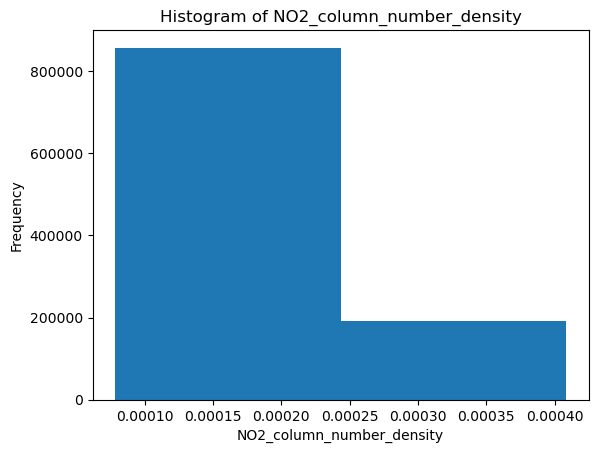

In [2]:
# Just to understand the dist. more
bins = pd.qcut(data['NO2_column_number_density'], q=2)
print(bins.value_counts(sort=False))

# Hist.
plt.hist(data['NO2_column_number_density'], bins=2)

plt.xlabel('NO2_column_number_density')
plt.ylabel('Frequency')
plt.title('Histogram of NO2_column_number_density')

plt.savefig('C:/Users/yacoo/lulc-air-quality/figures/discretization-equal-frequency.png')
plt.show()


In [3]:
# Discretize the attributes using equal width method
# The big caveat is that the density levels are low and high RESPECTIVE to the dist. of the dataset
data['NO2_column_number_density'] = pd.qcut(x=data['NO2_column_number_density'], labels=["Low NO2 Levels", "High NO2 Levels"], q=2)
print(data['NO2_column_number_density'].head(100))

0     High NO2 Levels
1     High NO2 Levels
2     High NO2 Levels
3     High NO2 Levels
4     High NO2 Levels
           ...       
95    High NO2 Levels
96    High NO2 Levels
97    High NO2 Levels
98    High NO2 Levels
99    High NO2 Levels
Name: NO2_column_number_density, Length: 100, dtype: category
Categories (2, object): ['Low NO2 Levels' < 'High NO2 Levels']


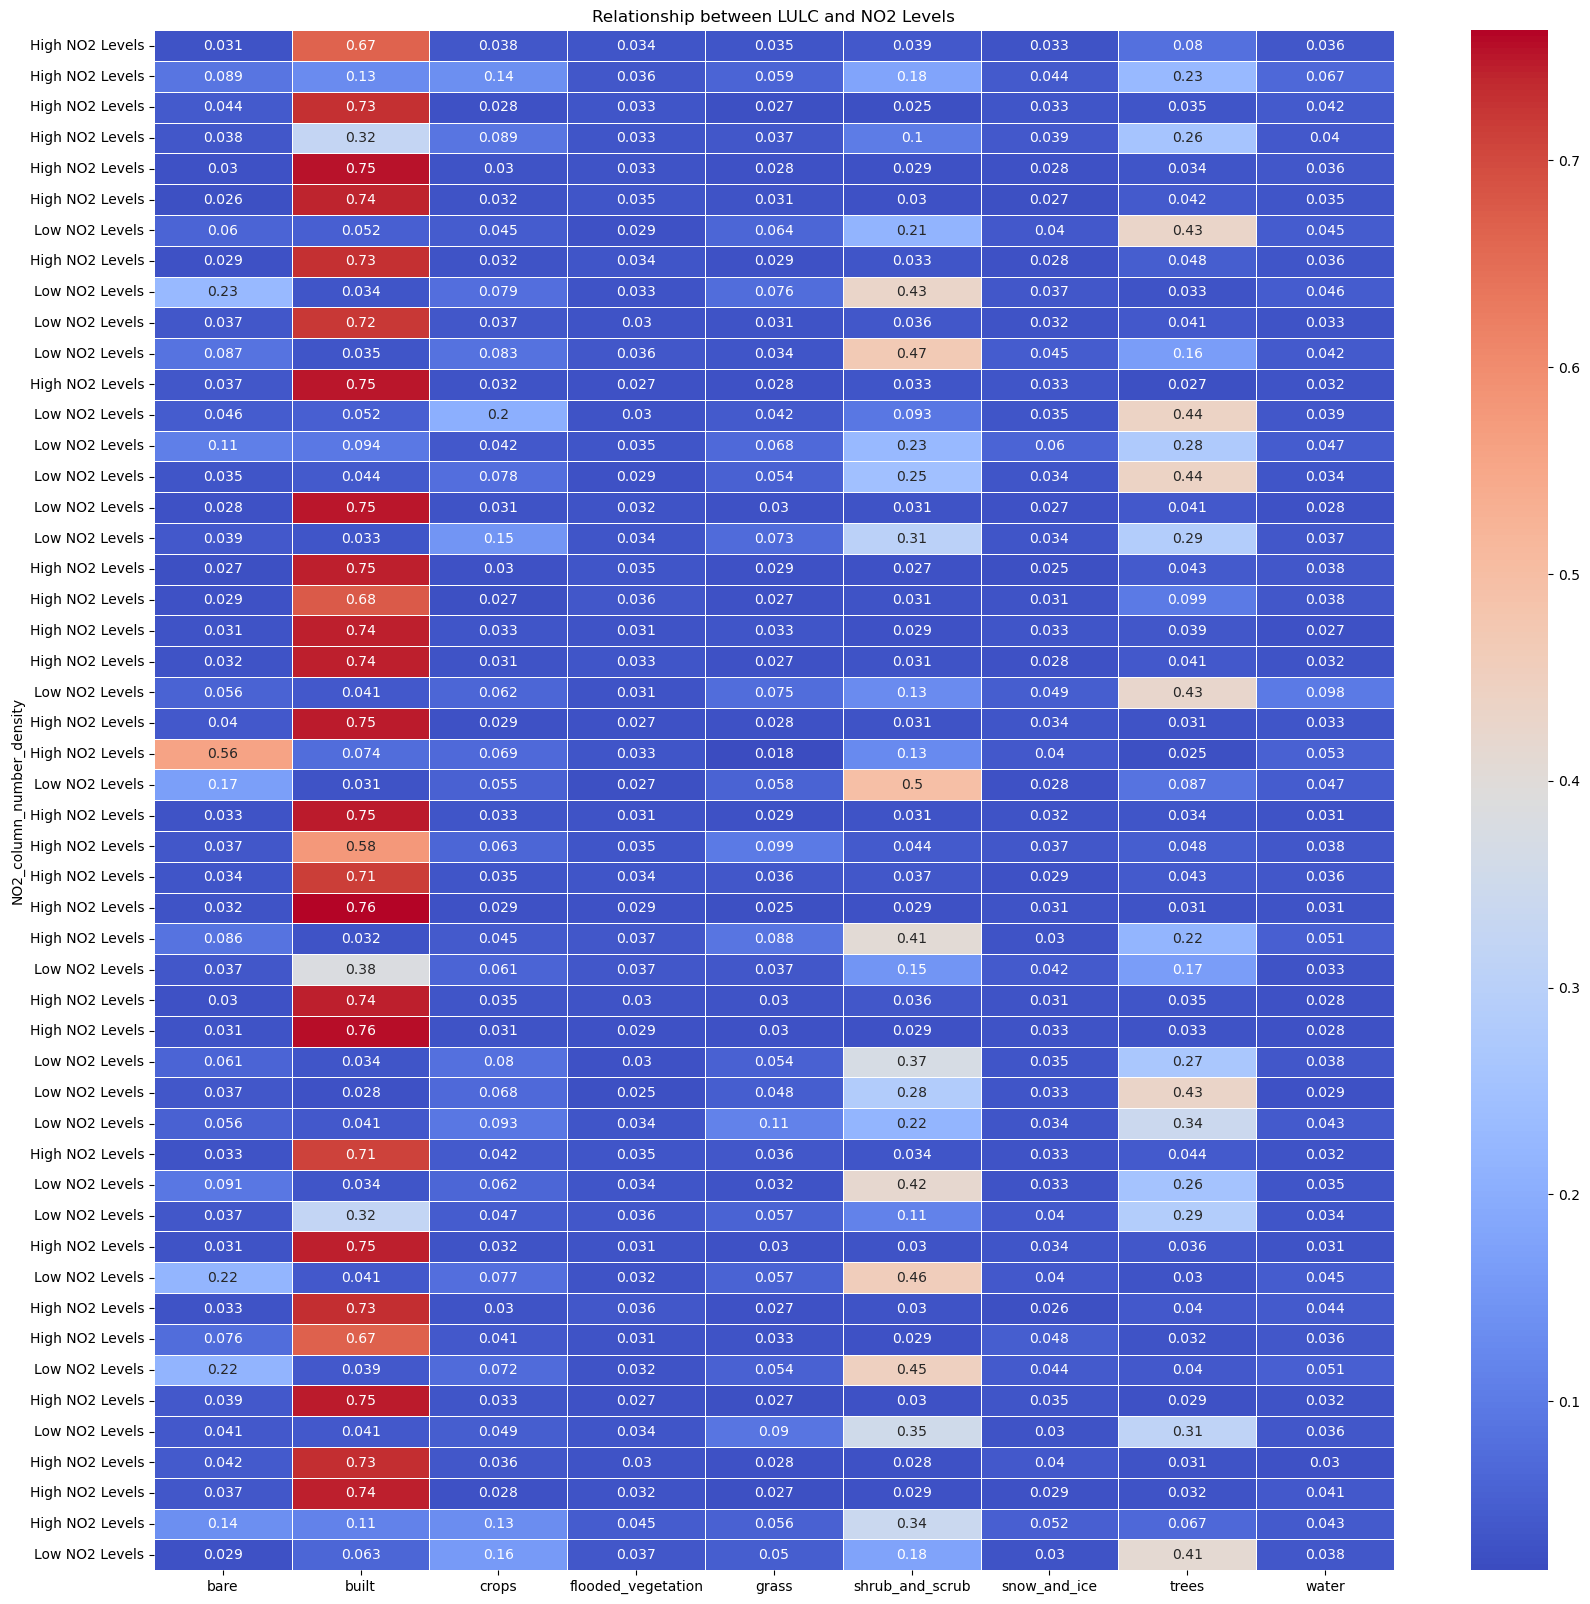

In [4]:
import seaborn as sns

sample = data.sample(n=50) 

sample.set_index('NO2_column_number_density', inplace=True)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sample, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Relationship between LULC and NO2 Levels')
plt.savefig('C:/Users/yacoo/lulc-air-quality/figures/heatmap.png')
plt.show()


In [6]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:               bare     built     crops  flooded_vegetation     grass  \
0        0.118978  0.615780  0.037095            0.032246  0.024238   
1        0.073208  0.659635  0.035133            0.036534  0.027986   
2        0.107143  0.622934  0.034605            0.034709  0.026477   
3        0.178386  0.527489  0.035730            0.033653  0.023553   
4        0.200875  0.475577  0.036696            0.037724  0.024319   
...           ...       ...       ...                 ...       ...   
1048570  0.076766  0.033344  0.065253            0.027162  0.049053   
1048571  0.049924  0.031947  0.042694            0.026498  0.051327   
1048572  0.052321  0.036046  0.059906            0.027036  0.055809   
1048573  0.062802  0.039303  0.091280            0.024556  0.058972   
1048574  0.058334  0.036734  0.104522            0.023938  0.061921   

         shrub_and_scrub  snow_and_ice     trees     water  
0               0.052000      0.033205  0.030157  0.051107  
1     

In [28]:
# Imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
class_weights_custom = {"Low NO2 Levels": 0.20, "High NO2 Levels": 0.75}

# DTC
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features=None, class_weight=None)

# Train the model
dtc.fit(X_train, y_train)

# Predictions on the test set
y_pred = dtc.predict(X_test)

cross_val_scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring='accuracy')

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [29]:
print("Accuracy: ", accuracy)
print(report)

# Cross validation
print(f'CV Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean()}')

Accuracy:  0.8458956202465251
                 precision    recall  f1-score   support

High NO2 Levels       0.86      0.82      0.84    104320
 Low NO2 Levels       0.83      0.87      0.85    105395

       accuracy                           0.85    209715
      macro avg       0.85      0.85      0.85    209715
   weighted avg       0.85      0.85      0.85    209715

CV Scores: [0.8462914  0.84506354 0.84620795 0.84446749 0.84478936 0.84639868
 0.84570727 0.84395489 0.84661326 0.846804  ]
Mean CV Accuracy: 0.845629783277305


C:\Users\yacoo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


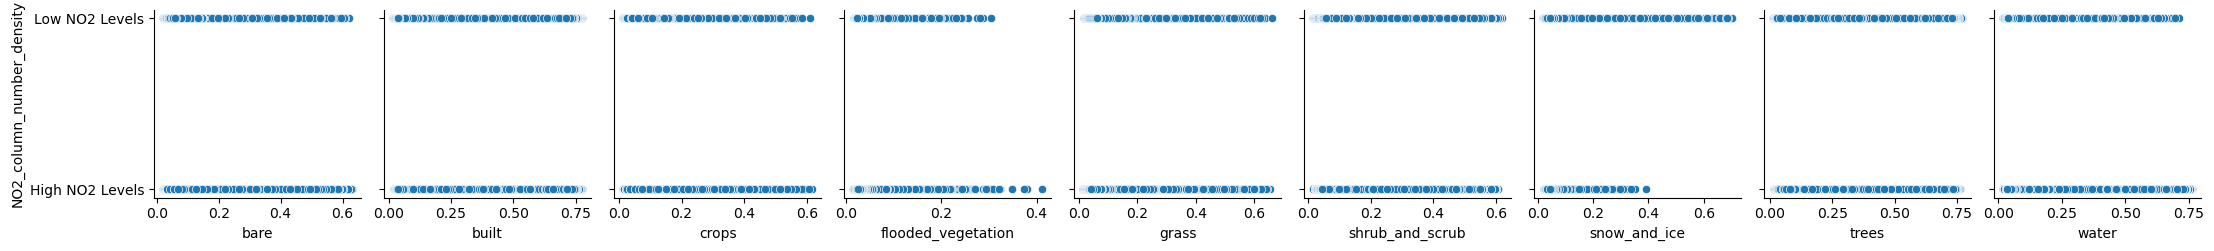

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the relationship between air quality attr. related to the LULC class labels
sns.pairplot(data, x_vars=['bare', 'built', 'crops', 'flooded_vegetation', 'grass', 'shrub_and_scrub', 'snow_and_ice', 'trees', 'water'], y_vars='NO2_column_number_density', kind='scatter')
plt.savefig('C:/Users/yacoo/lulc-air-quality/figures/scatterplot-individual.png')
plt.show()

In [8]:
# Drop the target output from the input train set
X = data[data.columns.drop('NO2_column_number_density')]
print("Input Attributes: ", X)
# Set the target output to the output train set
y = data['NO2_column_number_density']
print("Training Labels: ", y)

Input Attributes:               bare     built     crops  flooded_vegetation     grass  \
0        0.118978  0.615780  0.037095            0.032246  0.024238   
1        0.073208  0.659635  0.035133            0.036534  0.027986   
2        0.107143  0.622934  0.034605            0.034709  0.026477   
3        0.178386  0.527489  0.035730            0.033653  0.023553   
4        0.200875  0.475577  0.036696            0.037724  0.024319   
...           ...       ...       ...                 ...       ...   
1048570  0.076766  0.033344  0.065253            0.027162  0.049053   
1048571  0.049924  0.031947  0.042694            0.026498  0.051327   
1048572  0.052321  0.036046  0.059906            0.027036  0.055809   
1048573  0.062802  0.039303  0.091280            0.024556  0.058972   
1048574  0.058334  0.036734  0.104522            0.023938  0.061921   

         shrub_and_scrub  snow_and_ice     trees     water  
0               0.052000      0.033205  0.030157  0.051107  
1     

In [32]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Based on the dist. of the histogram
class_weights_custom = {"Low NO2 Levels": 0.20, "High NO2 Levels": 0.75}

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictiotns for class labels
y_pred = rf_clf.predict(X_test)

cross_val_scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')

# Eval
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [33]:
print("Accuracy: ", accuracy)
print(report)

# Cross validation
print(f'CV Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean()}')

Accuracy:  0.8560284195217319
                 precision    recall  f1-score   support

High NO2 Levels       0.87      0.84      0.85    104320
 Low NO2 Levels       0.85      0.87      0.86    105395

       accuracy                           0.86    209715
      macro avg       0.86      0.86      0.86    209715
   weighted avg       0.86      0.86      0.86    209715

CV Scores: [0.85418306 0.85541091 0.85609041 0.85424266 0.85567318 0.85638843
 0.85553012 0.85450492 0.85674606 0.85700832]
Mean CV Accuracy: 0.8555778079774932


In [34]:
# Determining what attr. hold % of class labels
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

built                0.25
shrub_and_scrub      0.19
trees                0.11
grass                0.11
water                0.07
bare                 0.07
crops                0.07
snow_and_ice         0.06
flooded_vegetation   0.06
dtype: float64


In [9]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|████████████████████████████████████████████████████████████████████████▍  | 28/29 [25:33:01<2:04:23, 7463.10s/it]

[LightGBM] [Info] Number of positive: 418893, number of negative: 419967
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499360 -> initscore=-0.002561
[LightGBM] [Info] Start training from score -0.002561


100%|█████████████████████████████████████████████████████████████████████████████| 29/29 [25:33:06<00:00, 3171.95s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.86               0.86    None      0.86   
ExtraTreesClassifier               0.86               0.86    None      0.86   
LGBMClassifier                     0.85               0.85    None      0.85   
SVC                                0.85               0.85    None      0.85   
BaggingClassifier                  0.84               0.84    None      0.84   
LogisticRegression                 0.84               0.84    None      0.84   
CalibratedClassifierCV             0.84               0.84    None      0.84   
LinearDiscriminantAnalysis         0.84               0.84    None      0.84   
RidgeClassifier                    0.84               0.84    None      0.84   
RidgeClassifierCV                  0.84               0.84    None      0.84   
LinearSVC                          0.84 